In [344]:
%matplotlib inline
from urllib import urlopen
import brewer2mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [345]:
from matplotlib import dates as mPlotDATEs   
from matplotlib.dates import date2num
from matplotlib.dates   import  DateFormatter,AutoDateLocator 
from matplotlib.ticker  import  ScalarFormatter, FuncFormatter
from matplotlib.dates   import  DateFormatter,AutoDateLocator 
from matplotlib.ticker  import  ScalarFormatter, FuncFormatter,StrMethodFormatter

In [346]:
#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [347]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [348]:
#from IPython.display import Image
#Image(filename='Italy.png')

In [370]:
df=pd.read_csv('Leah_current.csv')
df.head(5)

,investment period,Unnamed: 1,Unnamed: 2,expenditure period
0,scenerio 0,25000.00000,NaN,scenerio 0B
1,Jan-18,26083.33667,Sep-42,1031740.695
2,Feb-18,27173.89558,Oct-42,1010179.831
3,Mar-18,28271.72488,Nov-42,988547.0968
4,Apr-18,29376.87305,Dec-42,966842.2538


In [371]:
#rename columns
df.rename(columns={"investment period":"Pre_Retirement","Unnamed: 1":"Cash","Unnamed: 2":"Retirement","expenditure period":"Expenditure"}, inplace=True)

In [372]:
df.head()

,Pre_Retirement,Cash,Retirement,Expenditure
0,scenerio 0,25000.00000,NaN,scenerio 0B
1,Jan-18,26083.33667,Sep-42,1031740.695
2,Feb-18,27173.89558,Oct-42,1010179.831
3,Mar-18,28271.72488,Nov-42,988547.0968
4,Apr-18,29376.87305,Dec-42,966842.2538


In [373]:
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


In [374]:
import datetime as dt
>>> df["Pre_Retirement"] = df["Pre_Retirement"][1:].apply(lambda x: 
                                    dt.datetime.strptime(x,'%b-%y'))

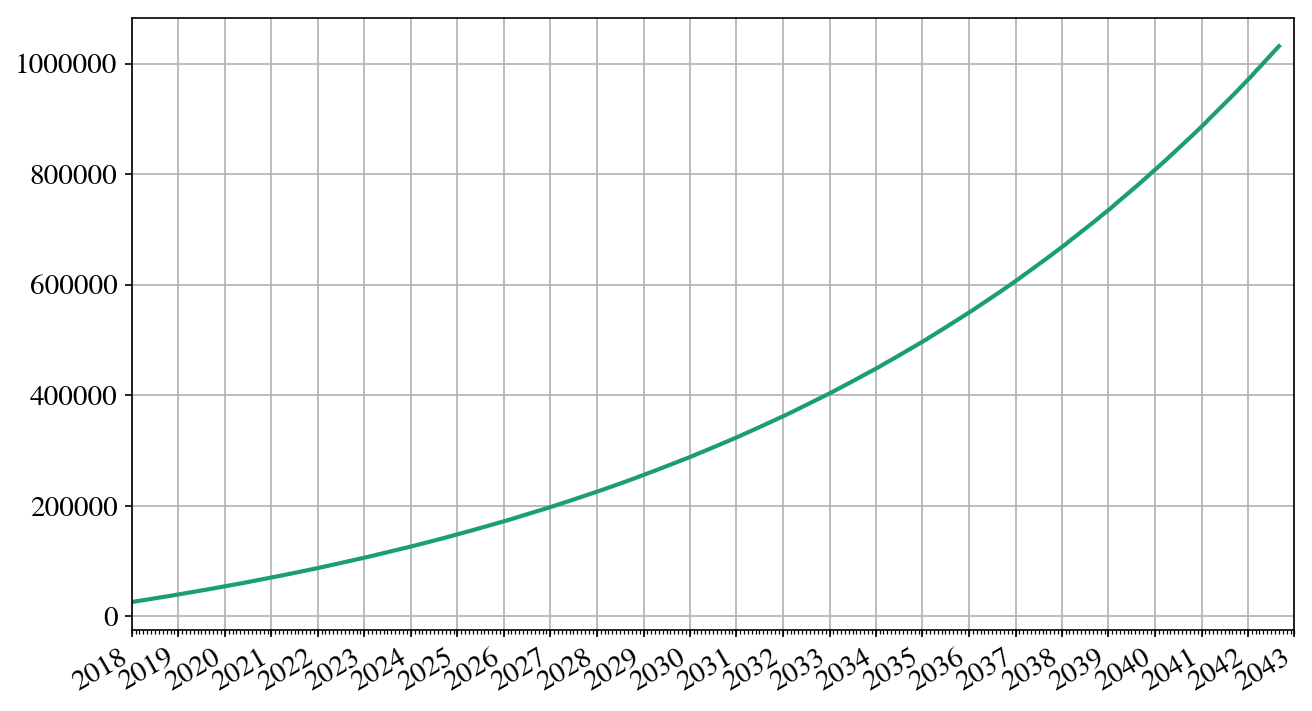

In [375]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(df.Pre_Retirement, df.Cash)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
datemin = datetime.date(df.Pre_Retirement.min().year, 1, 1)



datemax = datetime.date(df.Pre_Retirement.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
#def price(x):
#    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m')
#ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [376]:

df["Pre_Retirement"] = df["Pre_Retirement"][1:].apply(lambda x: 
                                    mdates.date2num(x))
df.head()

,Pre_Retirement,Cash,Retirement,Expenditure
0,NaN,25000.00000,NaN,scenerio 0B
1,736695.0,26083.33667,Sep-42,1031740.695
2,736726.0,27173.89558,Oct-42,1010179.831
3,736754.0,28271.72488,Nov-42,988547.0968
4,736785.0,29376.87305,Dec-42,966842.2538


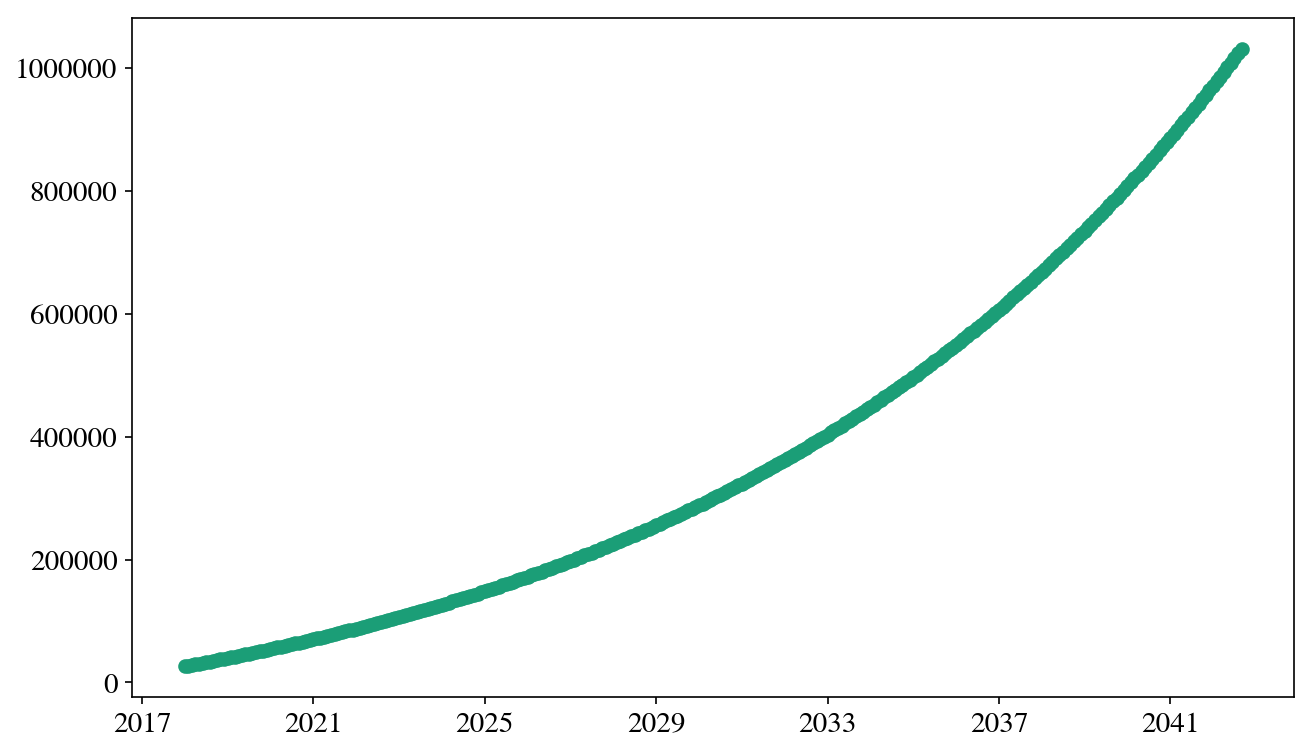

In [378]:

plt.plot_date((df.Pre_Retirement), df.Cash)
#plt.plot_date(x=days, y=impressions)
plt.show()


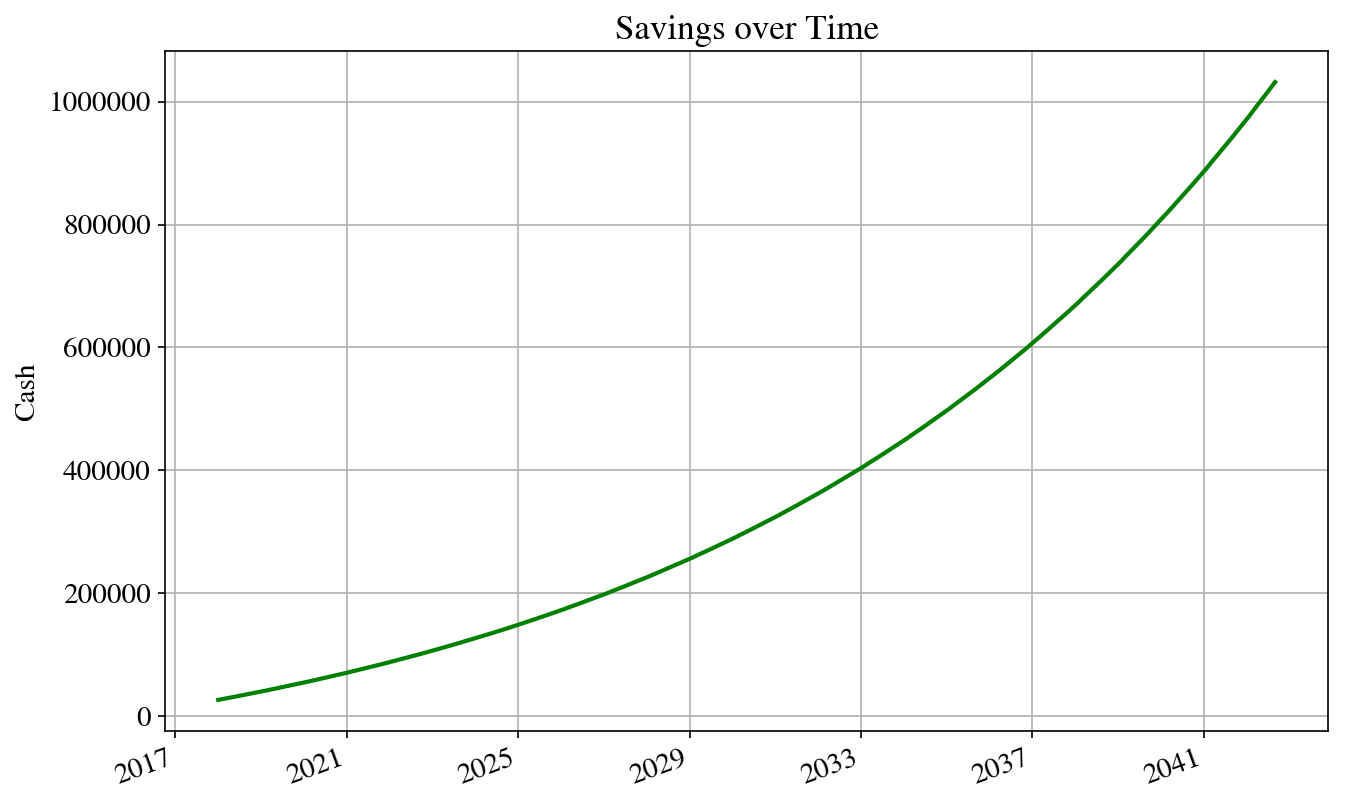

In [379]:
plt.plot_date(df.Pre_Retirement, df.Cash,fmt="g-")
plt.setp( plt.gca().get_xticklabels(),rotation= 20,horizontalalignment = 'right')
fig.autofmt_xdate()
plt.title("Savings over Time")
plt.ylabel("Cash")
plt.grid(True)
plt.show()


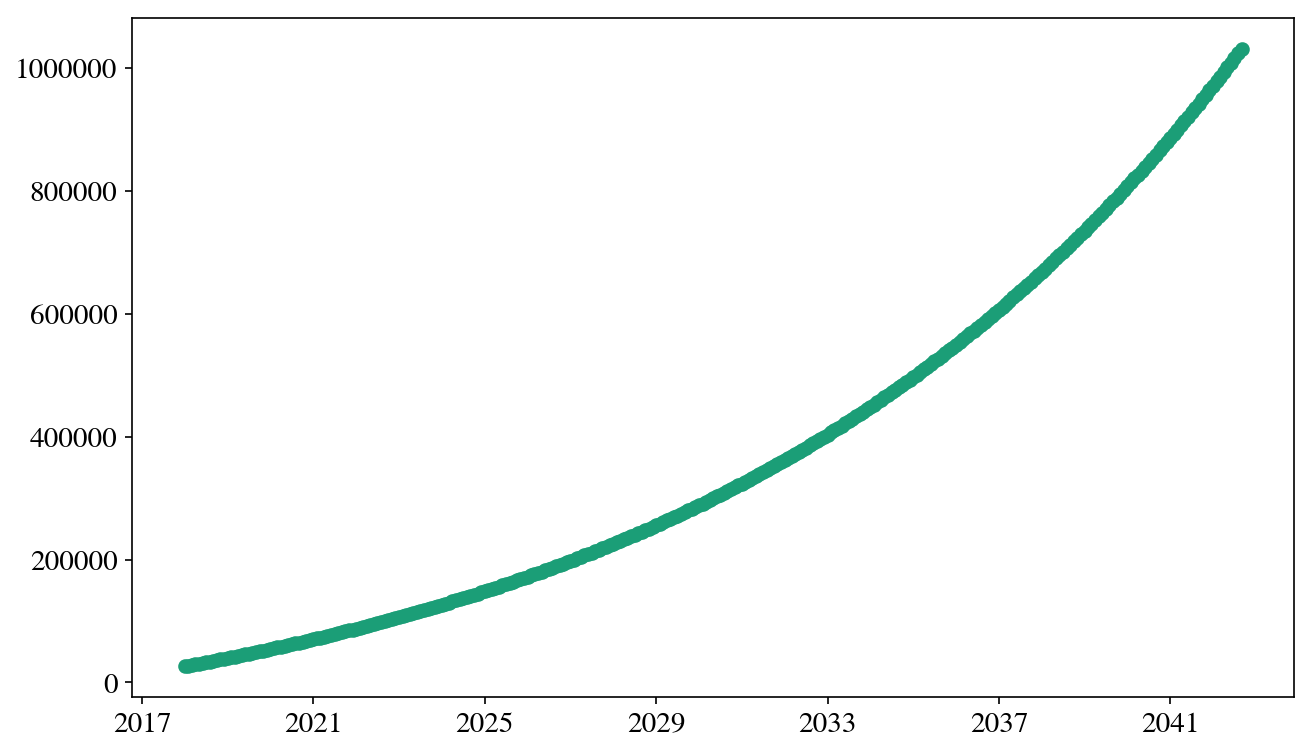

In [380]:
fig, ax = plt.subplots()
ax.plot_date(df.Pre_Retirement, df.Cash)

In [381]:
from matplotlib import dates as mPlotDATEs   
from matplotlib.dates import date2num
from matplotlib.dates   import  DateFormatter,AutoDateLocator 
from matplotlib.ticker  import  ScalarFormatter, FuncFormatter
from matplotlib.dates   import  DateFormatter,AutoDateLocator 
from matplotlib.ticker  import  ScalarFormatter, FuncFormatter,StrMethodFormatter

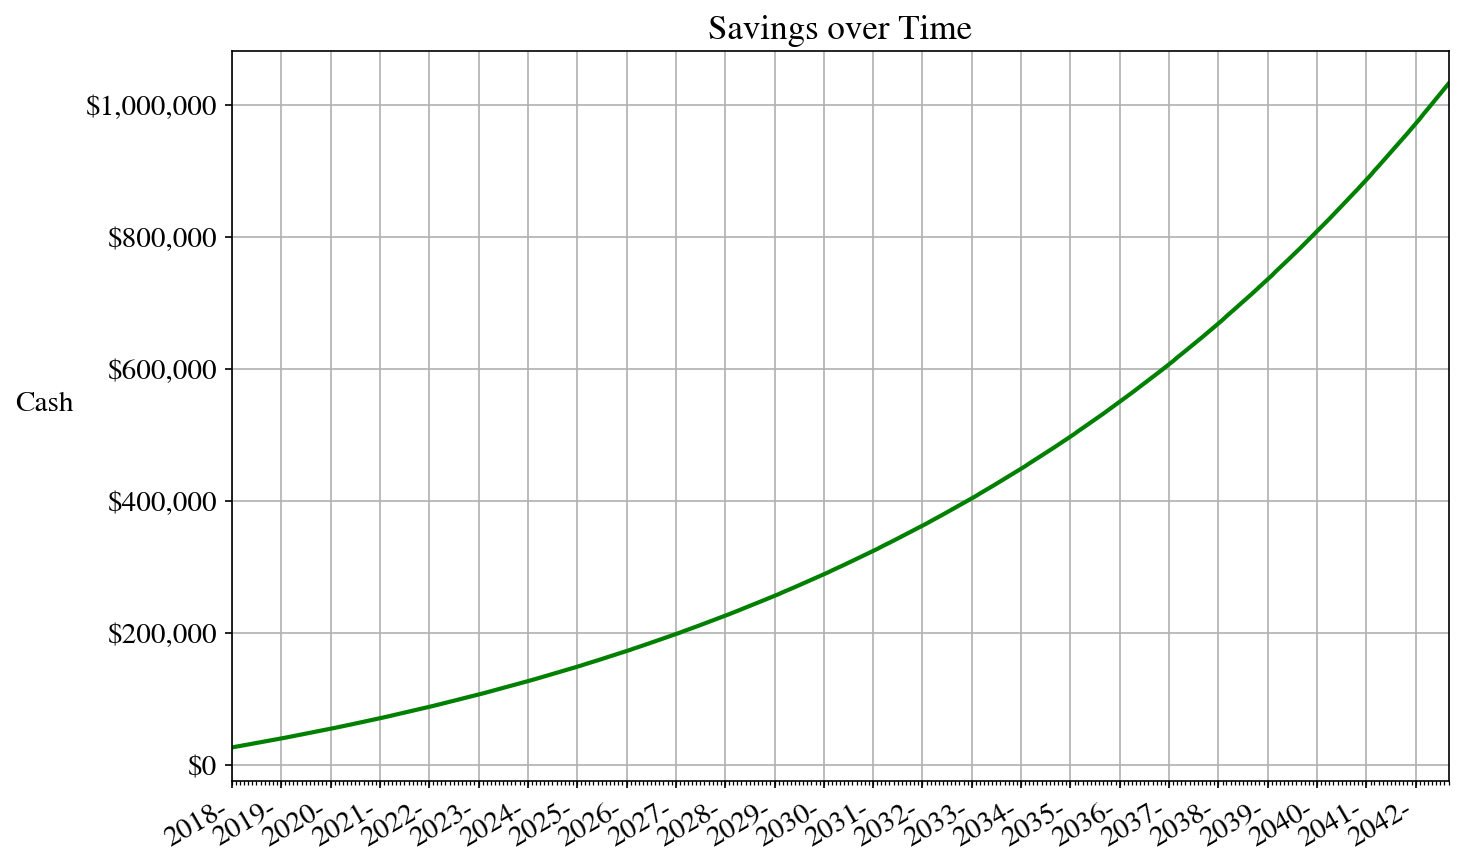

In [384]:
fig, ax = plt.subplots()
ax.plot_date(df.Pre_Retirement, df.Cash,fmt="g-")
#format x axis for dates
datemin = df.Pre_Retirement.min()
datemax = df.Pre_Retirement.max()
ax.set_xlim(datemin, datemax)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
fig.autofmt_xdate()

plt.title("Savings over Time")
plt.ylabel("Cash",rotation= 0)
#format y axis
yfmt = '${x:,.0f}'
ytick = StrMethodFormatter(yfmt)
ax.yaxis.set_major_formatter(ytick) 
#ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) --second way w/o $
ax.yaxis.labelpad = 20


fig.tight_layout()
plt.show()

fig.savefig("Leah_Retirement.pdf")
fig.savefig("Leah_Retirement.png")